<a href="https://colab.research.google.com/github/ClovisL/Wine-Quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the Data

In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/ClovisL/Wine-Quality/main/Resources/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Creates a new column for rating, from bad-average-good
reviews = []
for i in wine['quality']:
    if i >= 1 and i <= 3:
        reviews.append('bad')
    elif i >= 4 and i <= 7:
        reviews.append('average')
    elif i >= 8 and i <= 10:
        reviews.append('good')
wine['rating'] = reviews
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


# Logistic Regression Model

In [5]:
# Set quality column for y values
X = wine.drop(["quality", "rating"], axis=1)
y = wine["rating"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [7]:
# Standard scaling
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [9]:
model_predict = model.predict(X_test)

In [10]:
model_conf_matrix = confusion_matrix(y_test, model_predict)
model_acc_score = accuracy_score(y_test, model_predict)
print(model_conf_matrix)
print("Accuracy: "+str(model_acc_score*100)+"%")

[[396   0   0]
 [  1   0   0]
 [  3   0   0]]
Accuracy: 99.0%


# Deep Learning Model

In [11]:
X = wine.drop(["quality", "rating"], axis=1)
y = wine["rating"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [14]:
# Using MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [16]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=11))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [19]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
38/38 - 1s - loss: 1.0606 - accuracy: 0.6806 - 1s/epoch - 33ms/step
Epoch 2/100
38/38 - 0s - loss: 0.8927 - accuracy: 0.9800 - 108ms/epoch - 3ms/step
Epoch 3/100
38/38 - 0s - loss: 0.6578 - accuracy: 0.9800 - 69ms/epoch - 2ms/step
Epoch 4/100
38/38 - 0s - loss: 0.4136 - accuracy: 0.9800 - 117ms/epoch - 3ms/step
Epoch 5/100
38/38 - 0s - loss: 0.2151 - accuracy: 0.9800 - 113ms/epoch - 3ms/step
Epoch 6/100
38/38 - 0s - loss: 0.1316 - accuracy: 0.9800 - 129ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 0.1179 - accuracy: 0.9800 - 85ms/epoch - 2ms/step
Epoch 8/100
38/38 - 0s - loss: 0.1161 - accuracy: 0.9800 - 74ms/epoch - 2ms/step
Epoch 9/100
38/38 - 0s - loss: 0.1156 - accuracy: 0.9800 - 84ms/epoch - 2ms/step
Epoch 10/100
38/38 - 0s - loss: 0.1152 - accuracy: 0.9800 - 86ms/epoch - 2ms/step
Epoch 11/100
38/38 - 0s - loss: 0.1153 - accuracy: 0.9800 - 103ms/epoch - 3ms/step
Epoch 12/100
38/38 - 0s - loss: 0.1151 - accuracy: 0.9800 - 66ms/epoch - 2ms/step
Epoch 13/100
38/38 - 

In [22]:
# Quantify model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy*100}%")

13/13 - 0s - loss: 0.0542 - accuracy: 0.9900 - 475ms/epoch - 37ms/step
Normal Neural Network - Loss: 0.054152533411979675, Accuracy: 99.00000095367432%


# Models for exact quality score
A tree model and a deep learning model that attempt to determine the numerical score from 3-8 for the wines in the data set

## Trees Model for exact quality score

In [23]:
from sklearn import tree
target = wine["quality"]

In [24]:
data = wine.drop(["quality", "rating"], axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [26]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.57

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(f"Accuracy: {rf.score(X_test, y_test)*100}%")

Accuracy: 67.5%


In [28]:
# Determine which variables are least important
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.14540053067700837, 'alcohol'),
 (0.1157371938255992, 'sulphates'),
 (0.10529261941606942, 'total sulfur dioxide'),
 (0.10260343362817143, 'volatile acidity'),
 (0.09139598008375867, 'density'),
 (0.08362098997880432, 'chlorides'),
 (0.07358834547986286, 'pH'),
 (0.07219355776211514, 'fixed acidity'),
 (0.0716697491968824, 'citric acid'),
 (0.07133355280238213, 'residual sugar'),
 (0.06716404714934614, 'free sulfur dioxide')]

## Deep Learning Model for exact quality score

In [29]:
# Drop the quality columns, and the free sulfur dioxide as it is the least important
X = wine.drop(["quality", "rating", "free sulfur dioxide"], axis=1)
y = wine["quality"]
print(X.shape, y.shape)

(1599, 10) (1599,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

In [31]:
# Using MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [33]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [34]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=300, activation='relu', input_dim=10))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

In [35]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               3300      
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 64)                6464      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                

In [37]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
43/43 - 2s - loss: 1.5010 - accuracy: 0.4452 - 2s/epoch - 44ms/step
Epoch 2/200
43/43 - 0s - loss: 1.1896 - accuracy: 0.5254 - 244ms/epoch - 6ms/step
Epoch 3/200
43/43 - 0s - loss: 1.1414 - accuracy: 0.5673 - 196ms/epoch - 5ms/step
Epoch 4/200
43/43 - 0s - loss: 1.1258 - accuracy: 0.5401 - 175ms/epoch - 4ms/step
Epoch 5/200
43/43 - 0s - loss: 1.1140 - accuracy: 0.5644 - 216ms/epoch - 5ms/step
Epoch 6/200
43/43 - 0s - loss: 1.0919 - accuracy: 0.5717 - 244ms/epoch - 6ms/step
Epoch 7/200
43/43 - 0s - loss: 1.0936 - accuracy: 0.5467 - 258ms/epoch - 6ms/step
Epoch 8/200
43/43 - 0s - loss: 1.0848 - accuracy: 0.5703 - 227ms/epoch - 5ms/step
Epoch 9/200
43/43 - 0s - loss: 1.0816 - accuracy: 0.5460 - 171ms/epoch - 4ms/step
Epoch 10/200
43/43 - 0s - loss: 1.0648 - accuracy: 0.5556 - 151ms/epoch - 4ms/step
Epoch 11/200
43/43 - 0s - loss: 1.0643 - accuracy: 0.5622 - 162ms/epoch - 4ms/step
Epoch 12/200
43/43 - 0s - loss: 1.0564 - accuracy: 0.5769 - 306ms/epoch - 7ms/step
Epoch 13/200
43

In [38]:
# Quantify model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy*100}%")

8/8 - 0s - loss: 1.9606 - accuracy: 0.6667 - 174ms/epoch - 22ms/step
Normal Neural Network - Loss: 1.9606287479400635, Accuracy: 66.66666865348816%


# Charts

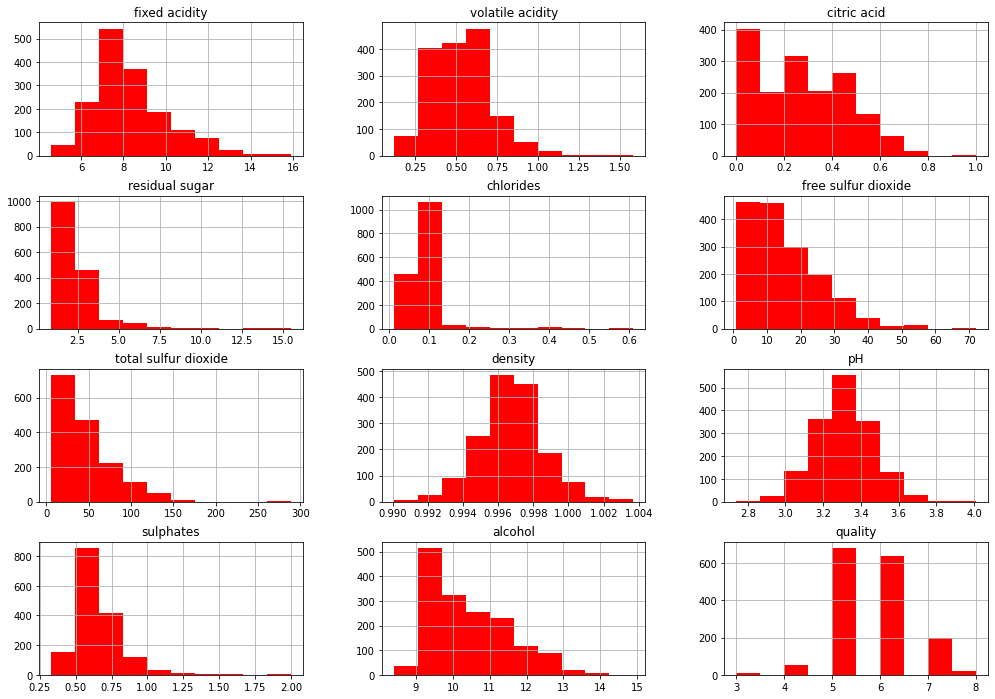

In [39]:
wine.hist(figsize=(17,12),color='Red')
plt.show()

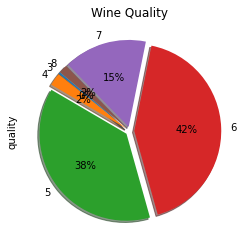

In [40]:
explode = (0.05, 0.05, 0.05, 0.05, .05, .05)
pie_chart_data = wine.groupby('quality')['quality'].sum().plot(kind = "pie", autopct="%1.0f%%", explode=explode, shadow=True, startangle=140)
pie_chart_data
plt.title("Wine Quality")

# Save the figure
plt.savefig("Pie Chart is for  average votes as per Genre.png")
plt.show()

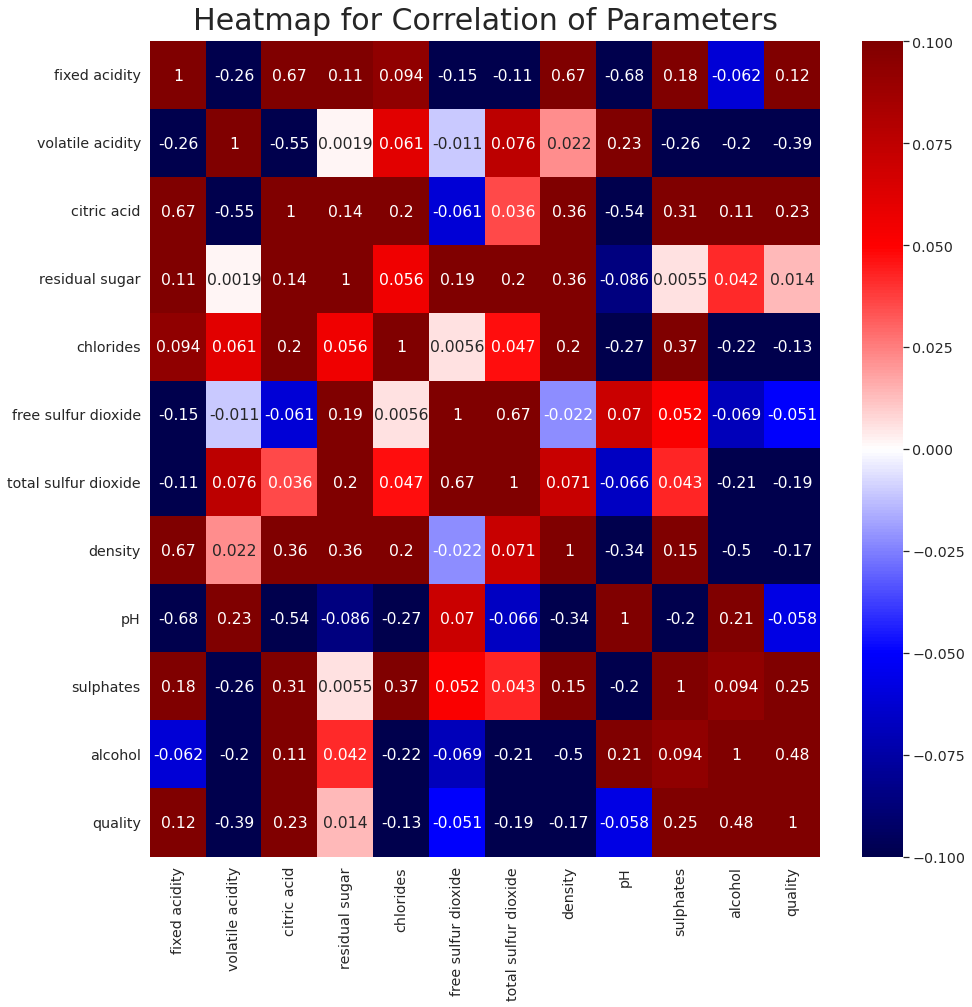

In [41]:
corr = wine[wine.columns].corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.3)
sns.heatmap(corr, cmap="seismic", annot = True, vmin=0, vmax=0)
plt.title('Heatmap for Correlation of Parameters', fontdict={'fontsize':30}, pad=12)
plt.show()